# Question 1: _Decision Tree Classifier_
- References: 
    - https://www.youtube.com/watch?v=NxEHSAfFlK8
    - https://www.youtube.com/watch?v=sgQAhG5Q7iY

## Task: 
- _Predicting if a person has a college degree based on age and salary_

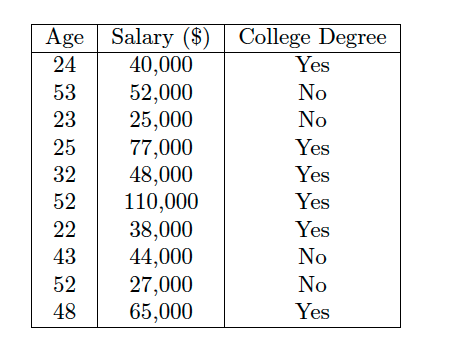

## Importing the Libraries

In [1]:
import seaborn as sns
import pandas as pd
from numpy import argwhere as aw
from numpy import argmax as am
from numpy import bincount as cnt
from numpy import log2
from numpy.random import choice as rc

## Creating the DataSet in pandas

In [2]:
col = ['Age','Salary','Degree']
Ages = [24,53,23,25,32,52,22,43,52,48]
Salary = [40000,52000,25000,77000,48000,110000,38000,44000,27000,65000]
Degree = [1,0,0,1,1,1,1,0,0,1]
Combinedlist = list(zip(Ages,Salary,Degree))
DTCdataframe = pd.DataFrame(Combinedlist,columns=col)

## Visualizing the Data

In [3]:
DTCdataframe

,Age,Salary,Degree
0,24,40000,1
1,53,52000,0
2,23,25000,0
3,25,77000,1
4,32,48000,1
5,52,110000,1
6,22,38000,1
7,43,44000,0
8,52,27000,0
9,48,65000,1


<AxesSubplot:xlabel='Age', ylabel='Salary'>

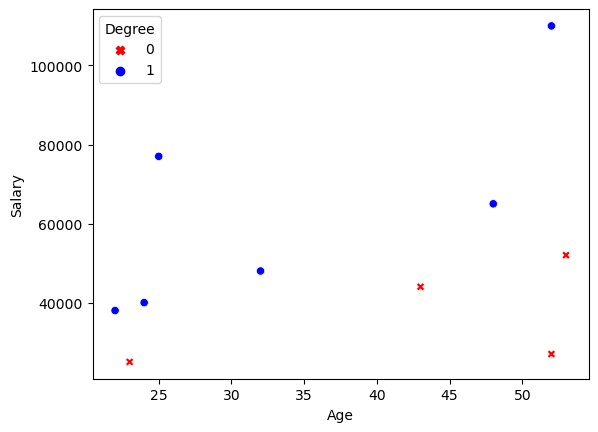

In [4]:
sns.scatterplot(data=DTCdataframe,x='Age',Y='Salary',hue='Degree',palette={0:'red',1:'blue'},style='Degree', markers=['X','o'])

## Coding the Decision Tree Regressor

In [5]:
class DTN:
    #Initializing the Decision tree Node  object with default parameters as below
    def __init__(self,Attribute=None,SplittingVal=None,ChildSplitL=None,ChildSplitR=None,LeafNodeLabels=None,*,LeafNodeInstanceCount=0):self.Attribute,self.SplittingVal,self.ChildSplitL,self.ChildSplitR,self.LeafNodeLabels,self.LeafNodeInstanceCount=Attribute,SplittingVal,ChildSplitL,ChildSplitR,LeafNodeLabels,0
    #Node Method to check if the current node is a leaf node or not and is used in the predicition function 
    def LastNodeCheck(self):return self.LeafNodeLabels != None
class DecisionTree:
    def __init__(self,RecursionLim=100,NodeInstances=2):self.RecursionLim,self.NodeInstances,self.root,self.Zero,self.SplittingChoices,self.IGprops,self.MaxTreeDepth=RecursionLim,NodeInstances,None,0,list(),list(),list()
    #Termination condition for the leaf node:-
    #->If the Node consists of only 1 class labels(pure split)
    #->If the recursion tree depth is exceeded to prevent register overflow while tree construction
    #->If the leaf node consists of only 1 instance, which cannot be split further as the minimum number of instances required to split is 2
    def IsGoal(self,RecuresionLevel):
        #The if condition below considers all the aforementioned criterions to terminate the tree building recursion
        if (RecuresionLevel>=self.RecursionLim or self.RemainingClasses==1 or self.RemainingNodeInstances<self.NodeInstances):return True
        return False
    def ImpuirtyInSplit(self,TrainingTargetLabels):
        #Function to evaluate the Impurity of the Node using the Training Labels distribution of the node
        #This function uses Entropy as the primary metric for evaluating the Impurity of the node label distribution
        #First we calculate the probability of teach class label instance present in the node and divide it by 
        #the number of instances present in the curernt node
        PartialProbability=cnt(TrainingTargetLabels)/len(TrainingTargetLabels)
        #Then we use the regular formula of Entropy calculation to calculate the Impurity of the Node as below
        TempCalc = [IndividualClassPartialProb*log2(IndividualClassPartialProb) for IndividualClassPartialProb in PartialProbability if IndividualClassPartialProb>self.Zero]
        #We do the summation of the impurities of each class
        Impurity=sum(TempCalc)
        #Then take the negation of the sum to finally and return the metric score
        return -Impurity
    def CalculateInformationGain(self,AttributesDF,TrainingTargetLabels,SplittingValue):
        #This function Calculates the Information gain for each split that can be generated using the EvaluateIdealBiforcation function
        #We use the argwhere function to seperate the data based on the splitting condition into left node attributes and labels and similarly right node attributes and labels
        PrevNodeIG,SplitDexL,SplitDexR=self.ImpuirtyInSplit(TrainingTargetLabels),aw(AttributesDF<=SplittingValue),aw(AttributesDF>SplittingValue)
        #using the argmax returns a vertical vector hence it needs to be flattened into a row vector
        SplitDexL,SplitDexR = SplitDexL.flatten(),SplitDexR.flatten()
        #Then we calculate the lengths of the newly splitted nodes and the original length
        n,InstancesToL,InstancesToR=len(TrainingTargetLabels),len(SplitDexL),len(SplitDexR)
        #We check if any of the new nodes is completely removed in which case we return 0 IG since the node is already pure
        if InstancesToL==self.Zero or InstancesToR==self.Zero:return self.Zero
        #If not 0 we calculate the new InfoGain by taking the difference between the parent Nodes Entropy and the new splitted node info gain as below
        NextNodeIG=(InstancesToL/n)*self.ImpuirtyInSplit(TrainingTargetLabels[SplitDexL])+(InstancesToR/n)*self.ImpuirtyInSplit(TrainingTargetLabels[SplitDexR])
        #Returning the IG score of the split
        return PrevNodeIG-NextNodeIG
    def EvaluateIdealBiforcation(self,AttributesDF,TrainingTargetLabels,Attributes):
        #This function finds the ideal attribute and its indexes the node splitting by using the Info gain as the criteria for evaluation and
        #generating the a IGs for all the possible splits based on distinct values
        PrevPropertiesOfIG={'InfoGainForCurrSplit':-float('inf'),'CurrentSplitAttribute':self.Zero,'SplittingValue':self.Zero}
        #Iterating over each Hashed value passed in the function call
        for _,Atrribute in enumerate(Attributes):
            # Starting with each attribute as a basis if splitting we generate diffrent metrics and store it in a local dictionary
            SelectedAttributeForSplit=AttributesDF[:,Atrribute]
            # We generate the set of distinct attribute values present in the dataframe to serve as the splitting value threshold
            SplitValues=set(SelectedAttributeForSplit)
            #For each splitting value we iterate and calculate the IG
            for __,SplittingValue in enumerate(SplitValues):
                #Using the CalculateInformationGain Function method for obtaining the IG score and storing it
                InfoGainForCurrSplit=self.CalculateInformationGain(SelectedAttributeForSplit,TrainingTargetLabels,SplittingValue)
                #We update a local dictionary to refer the previous values an dupdate if we see a gain in information
                if InfoGainForCurrSplit>PrevPropertiesOfIG['InfoGainForCurrSplit']:PrevPropertiesOfIG['InfoGainForCurrSplit'],PrevPropertiesOfIG['CurrentSplitAttribute'],PrevPropertiesOfIG['SplittingValue']=InfoGainForCurrSplit,Atrribute,SplittingValue
        #Returning the finally chosen Attribute and the Splitting Value
        self.IGprops.append(PrevPropertiesOfIG)
        return PrevPropertiesOfIG['CurrentSplitAttribute'],PrevPropertiesOfIG['SplittingValue']
    def GenerateDecisions(self,AttributesDF,TrainingTargetLabels,RecuresionLevel=0):
        
        #This function is the function that actually does the tree generation and splitting at each node with the help of all the helper functions
        self.RemainingNodeInstances,self.NodeAttributes=AttributesDF.shape
        #Checking for leaf node purity by creating a set and cheking its length
        self.RemainingClasses=len(set(TrainingTargetLabels))
        self.SplittingChoices.extend([AttributesDF.shape[0]])
        #We check for any of the termination condition met to stop the generation of the branch unitl all the branches are 
        #fully developed or the Max recursion depth is reached
        if self.IsGoal(RecuresionLevel):
            #If not goal we continue by selecting calculating the count of the prominant label in the node
            CountOfProminentLabel=am(cnt(TrainingTargetLabels))
            #Create the New node with passing the count of the labels
            self.MaxTreeDepth.append(RecuresionLevel)
            return DTN(LeafNodeLabels=CountOfProminentLabel)
        #Selecting a random attribute without replacing to execute the EvaluateIdealBiforcation function for IG evealuation
        SelectedChanceAttr=rc(self.NodeAttributes,self.NodeAttributes,replace=False)
        #Storing the results from the EvaluateIdealBiforcation function
        HighestIGAttribute,MaxIGSplitValue=self.EvaluateIdealBiforcation(AttributesDF,TrainingTargetLabels,SelectedChanceAttr)
        self.SplittingChoices.append((HighestIGAttribute,MaxIGSplitValue))
        #Generating the splitting index for the the HighestIGAttribute and MaxIGSplitValue using argwhere
        SplitDexL,SplitDexR=aw(AttributesDF[:,HighestIGAttribute]<=MaxIGSplitValue),aw(AttributesDF[:,HighestIGAttribute]>MaxIGSplitValue)
        #Flattening the result of argwhere
        SplitDexL,SplitDexR = SplitDexL.flatten(),SplitDexR.flatten()
        #Recursive call for the creation of next split and as the base condition we start creating the nodes
        leafNodeInstances = len(TrainingTargetLabels)
        #print("1",leafNodeInstances) 
        ChildNodeL=self.GenerateDecisions(AttributesDF[SplitDexL,:],TrainingTargetLabels[SplitDexL],RecuresionLevel+1)
        leafNodeInstances = len(TrainingTargetLabels)
        #print("2",leafNodeInstances)
        ChildNodeR=self.GenerateDecisions(AttributesDF[SplitDexR,:],TrainingTargetLabels[SplitDexR],RecuresionLevel+1)
        leafNodeInstances = len(TrainingTargetLabels)
        #print("3",leafNodeInstances)
        return DTN(HighestIGAttribute,MaxIGSplitValue,ChildNodeL,ChildNodeR,LeafNodeInstanceCount=leafNodeInstances)
    def _PredictViaTraversal(self,TestingAttributes,CurrentNode):
        #During the prediction we check if we reach the leaf node as the base condition for classification
        if CurrentNode.LastNodeCheck():return CurrentNode.LeafNodeLabels
        #Else we recursively traverse the genearted tree through evaluation of the splitting decisions traversal to left
        if TestingAttributes[CurrentNode.Attribute]<=CurrentNode.SplittingVal:return self._PredictViaTraversal(TestingAttributes,CurrentNode.ChildSplitL)
        #Traversal to the right node
        return self._PredictViaTraversal(TestingAttributes,CurrentNode.ChildSplitR)
    #GetTreeNodes function is a modified version of my own submission in Applied algorithms assigment to print in levelorder from the node specified
    def _GetLeafNodes(self,root):
        TreeQ =list()
        if root != None:
            #3 lists to store the attributes and threshold splitting values used to generate the tree
            StoreAttr,TreeQ = list(),TreeQ+[root]
            while TreeQ:
                #Using a BFS Queue for iterating through the nodes checking for leaf values
                TreeN = TreeQ.pop(0)
                if TreeN.ChildSplitL.SplittingVal != None:TreeQ.append(TreeN.ChildSplitL)
                else:StoreAttr.append(TreeN.ChildSplitL.LeafNodeLabels)
                if TreeN.ChildSplitR.SplittingVal != None:TreeQ.append(TreeN.ChildSplitR)
                else:StoreAttr.append(TreeN.ChildSplitR.LeafNodeLabels)
            return StoreAttr
        else:return list()
    #pprint a pretty print function that uses stored Info from data frame features and the recusive tree building algorithm to generate a readable tree 
    @property
    def pprint(self):
        Result = self._GetLeafNodes(self.root)
        for _,__ in enumerate(self.SplittingChoices):
            if _ ==0:
                print(f"Root Node has {__} samples")
                print("____________________________")
            elif __.__class__ is tuple:
                childcount = 0
                print(f"Split using {self.DFAttr[__[0]]} feature with threshold value of {__[1]}")
                print("____________________________")
            elif __.__class__ is int and not childcount:
                childcount +=1
                print(f"Prev split generated Left Child with {__} instances",end=" ")
            elif __.__class__ is int and childcount:
                print(f"and a Right Child with {__} instances")
                print("____________________________")
        print(f"_____The Tree for the training data has been generated with a maximum depth of {max(self.MaxTreeDepth)}")
        print("____________________________")
        print("The leaf nodes have the classes as ",end=' ')
        for X in Result: print(f'{"Yes" if X else "No"},',end=" ")
        
    #Simple wrapper function called fit for the decision tree training
    def fit(self,AttributesDF,TrainingTargetLabels,DFAttr):self.root,self.DFAttr=self.GenerateDecisions(AttributesDF,TrainingTargetLabels),DFAttr
    #Simple wrapper function called predict for the decision tree traversal and predicting based on the training data
    def predict(self,TestingAttributes):return [self._PredictViaTraversal(Instance,self.root) for ___,Instance in enumerate(TestingAttributes)]

In [6]:
DTCdataframe.columns[:-1]

Index(['Age', 'Salary'], dtype='object')

## Training the Classifier

In [7]:
X = DTCdataframe.drop('Degree',axis=1).values
Y = DTCdataframe['Degree'].values
#Fitting the Dataset
DecisionTree = DecisionTree(RecursionLim=10)
DecisionTree.fit(X,Y,DTCdataframe.columns[:-1])
# P = DecisionTree.predict(X)

## The Information gain and the splitting feature and threshold value for each split is given as:-
- Here the CurrentSplitAttribute 0 denotes Age attribute and 1 denotes Salary

In [8]:
for x in DecisionTree.IGprops: 
    for Y in x:print(f"{Y} = {x[Y]},",end=" ")
    print("\n") 

InfoGainForCurrSplit = 0.3219280948873623, CurrentSplitAttribute = 1, SplittingValue = 27000, 

InfoGainForCurrSplit = 0.31127812445913283, CurrentSplitAttribute = 0, SplittingValue = 32, 

InfoGainForCurrSplit = 1.0, CurrentSplitAttribute = 1, SplittingValue = 52000, 



## Printing the tree with the max depth

In [9]:
DecisionTree.pprint

Root Node has 10 samples
____________________________
Split using Salary feature with threshold value of 27000
____________________________
Prev split generated Left Child with 2 instances and a Right Child with 8 instances
____________________________
Split using Age feature with threshold value of 32
____________________________
Prev split generated Left Child with 4 instances and a Right Child with 4 instances
____________________________
Split using Salary feature with threshold value of 52000
____________________________
Prev split generated Left Child with 2 instances and a Right Child with 2 instances
____________________________
_____The Tree for the training data has been generated with a maximum depth of 3
____________________________
The leaf nodes have the classes as  No, Yes, No, Yes, 

## Decision boundary from the Classifier

<div> <img src="DCB.png" alt="Drawing" style="width: 700px;"/></div>

# Decision tree diagramatic representation

<div> <img src="Tree.png" alt="Drawing" style="width: 700px;"/></div>

<div> <img src="Decision_tree.png" alt="Drawing" style="width: 700px;"/></div>

## Advantages and Disadvantages of Multivariate Decision tree over Univariate Decision tree

| Advantages |
| ------ |
| Using Multivariate DT, We can remove the use of recursive tree structure and directly predict based on the function learned based on the linewar equation evaluation. |
|We can use multiple features to test at the same split without the need to revisit the feature down the tree. |
| Using MDT our results improve where the true relationship between the features is linearly distinguishable. |
| Using Linear regression models we can interpret the results in easier manner than Decision tree. |
| They are better at genearlization when correlated features are present. |

| Disadvantages |
| ------ |
| We essentially face all the problems corresponding to linear models like missing feature imputation for missing data, Normalization, Standardization etc for all the features. |
| Using Multivariate DT, essentially we learn using all the features eventhough they may not contribute significantly hence needs feature enginnering wherear univariate may not use them at all. |
| Using Multivariate DT, it is easier to overfit the data as we use the linear model weights which are easy to overfit |



## Multivariate Classification tree

In [74]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col = ['Age','Salary','Degree']
Ages = [24,53,23,25,32,52,22,43,52,48]
Salary = [40000,52000,25000,77000,48000,110000,38000,44000,27000,65000]
Degree = [1,0,0,1,1,1,1,0,0,1]
Combinedlist = list(zip(Ages,Salary,Degree))
DTCdataframe = pd.DataFrame(Combinedlist,columns=col)
X = DTCdataframe.drop('Degree',axis=1).values
Y = DTCdataframe['Degree'].values


In [79]:
X_train = sc.fit(X).transform(X)
PerceptronModel=Perceptron()
PerceptronModel.fit(X_train,Y)

Perceptron()

In [80]:
PerceptronModel.coef_

array([[-1.05267348,  3.21993655]])

In [83]:
PCCoefAlpha,PCCoefBeta = PerceptronModel.coef_[0]

3.2199365465185323

In [88]:
#From the above we can determine the Classification of the tree in a single test node as the following multivariate model
from numpy import sign
Res = []
for Age,Sal in X_train:
    Res.append("Yes" if sign(PCCoefAlpha*Age+PCCoefBeta*Sal+1) == 1 else "No")
Res

['Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes']

<div> <img src="MultiVartree.jpg" alt="Drawing" style="width: 700px;"/></div>

In [266]:
import pandas as pd
import numpy as np
import copy
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import math
from scipy import stats as st
from sklearn.metrics import zero_one_loss


### Function for AdaBoost on base classifier as Decision Tree

In [193]:
class AdaBoost():

  def __init__(self, T, lr, base_classifier):

      self.T = T
      self.lr = lr
      self.base_classifier = base_classifier

      self.classifiers = []
      self.weights = []

      self.errors= []
      self.train_errors = []
      self.test_errors = []


  def fit(self, X, Y, X_test, Y_test):

      sample_weights = np.full(len(X), 1 / len(X))

      for i in range(self.T):

        classifier = copy.copy(self.base_classifier)
        classifier.fit(X, Y, sample_weights)
        pred = classifier.predict(X)
        
        error = np.where(pred != Y, sample_weights, 0).sum()
        update_amount = self.lr * np.log((1 - error) / (error + 1e-10)) * 0.5

        postive_weights = sample_weights * np.exp(update_amount)
        negative_weights = sample_weights * np.exp(-1 * update_amount)
        sample_weights = np.where(pred != Y, postive_weights, negative_weights)

        sample_weights /= sample_weights.sum()

        self.classifiers.append(classifier)
        self.weights.append(update_amount)
        self.errors.append(error)

        predictions = self.predict(X)
        train_error = np.where(predictions != Y, 1, 0).sum() / len(X)
        self.train_errors.append(train_error)

        test_predictions = self.predict(X_test)
        test_error = np.where(test_predictions != Y_test, 1, 0). sum() / len(X_test)
        self.test_errors.append(test_error)
  
  def vote(self,preds,class_data):
        final_pred = []
        print(np.unique(preds))

        final_pred.append()

        return final_pred


  def predict(self, data):

        preds = np.stack([ classifier.predict(data) for classifier in self.classifiers], axis = 1)
        #print(preds)
        #print('Preds',len(preds))
        #class_data = [np.where(data == cls, self.weights, 0).sum() for cls in np.unique(data)]
        #print(class_data)
        # print(len(class_data))
        majority_vote = lambda x: np.unique(x)[np.argmax([np.where(x == cls, self.weights, 0).sum() for cls in np.unique(x)])]
        # print(majority_vote)

        final_preds = np.apply_along_axis(majority_vote, axis = 1, arr= preds)


        return final_preds

### Reading all 3 Datasets

In [532]:
col1 = [i for i in range(17)]
col2 = [i for i in range(20)]
col3 = [i for i in range(57)]
col2.append('label')
col3.append('label')

In [535]:
letter_data = pd.read_csv('/content/drive/MyDrive/letter-recognition.data', names = col1)
german_data = pd.read_csv('/content/drive/MyDrive/german.data',sep = '\s+',names = col2)
spam_data = pd.read_csv('/content/drive/MyDrive/spambase.data', names = col3)


In [197]:
letter_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [478]:
german_data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [536]:
spam_data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [200]:
letter_c = letter_data.loc[letter_data[0] == 'C']

In [201]:
letter_g = letter_data.loc[letter_data[0] == 'G']

In [202]:
letter_new = pd.concat([letter_c,letter_g])
letter_new = letter_new.reset_index()
letter_new.drop(labels = 'index', axis = 1, inplace= True)

In [203]:
letter_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,C,7,10,5,5,2,6,8,6,8,11,7,11,2,8,5,9
1,C,6,11,7,8,3,7,8,7,11,4,7,14,1,7,4,8
2,C,6,10,4,5,2,6,9,6,6,11,7,7,2,9,5,9
3,C,2,3,3,1,1,5,9,4,6,11,9,11,1,9,2,8
4,C,6,12,5,7,4,8,5,4,3,9,9,11,4,9,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,G,2,4,3,3,2,7,7,5,5,6,6,9,2,8,4,9
1505,G,4,9,6,6,6,7,7,6,3,7,6,9,5,7,7,7
1506,G,5,10,6,7,4,6,7,7,7,10,7,11,2,10,4,9
1507,G,2,3,3,2,1,7,7,5,5,10,7,10,2,9,4,10


# Model 1

### Applying Adaboost on Shallow Decision Tree for the 1st Dataset

In [204]:
from sklearn.model_selection import train_test_split 

In [205]:
labels = letter_new[0]
letter_new = letter_new.drop(labels = 0,axis = 1)

In [206]:
letter_new
letter_new.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [207]:
X_train , X_test , y_train , y_test = train_test_split(letter_new,labels,test_size = 0.7)

In [208]:
X_train

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
499,5,7,6,5,6,6,6,4,3,7,6,11,5,9,3,9
47,3,2,4,4,2,5,8,7,7,9,8,13,1,9,4,10
1414,3,8,5,6,4,8,7,7,5,6,6,9,2,7,5,11
528,4,9,4,4,3,7,7,4,3,9,8,10,3,9,8,10
30,5,8,7,7,6,5,7,3,4,7,6,11,4,10,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,8,11,5,6,2,7,8,6,7,11,6,9,2,9,5,9
599,7,10,9,8,6,6,8,8,6,5,6,13,6,8,5,6
1314,4,5,5,4,3,7,7,6,7,9,6,11,2,10,5,9
620,5,11,6,8,4,3,8,6,6,12,10,13,2,9,3,7


In [209]:
classifier = DecisionTreeClassifier(max_depth = 1,max_leaf_nodes=2)
D1_ada_shallow = AdaBoost(T= 50 , lr = 1, base_classifier = classifier)
D1_ada_shallow.fit(X_train, y_train, X_test , y_test)

In [210]:
predds = D1_ada_shallow.predict(X_test)

In [211]:
predds = predds.tolist()


In [212]:
print(predds)

['C', 'C', 'G', 'C', 'C', 'C', 'C', 'C', 'G', 'C', 'G', 'G', 'C', 'C', 'G', 'C', 'G', 'G', 'G', 'C', 'G', 'C', 'G', 'C', 'C', 'C', 'G', 'G', 'C', 'C', 'G', 'G', 'C', 'C', 'C', 'G', 'G', 'C', 'C', 'G', 'C', 'C', 'G', 'C', 'C', 'C', 'G', 'C', 'C', 'G', 'C', 'C', 'C', 'C', 'G', 'G', 'C', 'G', 'C', 'C', 'C', 'G', 'C', 'G', 'G', 'C', 'C', 'G', 'C', 'G', 'C', 'G', 'C', 'G', 'C', 'C', 'G', 'C', 'G', 'C', 'C', 'G', 'G', 'C', 'C', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'C', 'G', 'C', 'C', 'G', 'C', 'G', 'G', 'C', 'C', 'G', 'G', 'G', 'G', 'C', 'G', 'C', 'G', 'C', 'C', 'G', 'G', 'G', 'C', 'C', 'G', 'C', 'G', 'G', 'C', 'C', 'G', 'C', 'G', 'C', 'C', 'G', 'G', 'G', 'C', 'G', 'C', 'C', 'C', 'G', 'G', 'C', 'C', 'G', 'C', 'G', 'C', 'C', 'G', 'G', 'C', 'G', 'C', 'G', 'C', 'C', 'C', 'G', 'C', 'C', 'G', 'G', 'G', 'C', 'G', 'C', 'C', 'G', 'G', 'C', 'C', 'C', 'C', 'G', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'G', 'G', 'C', 'G', 'G', 'C', 'G', 'G', 'C', 'C', 'C', 'G', 'C', 'C', 'G', 'G', 'C', 'C', 'C', 'G', 'C', 'C',

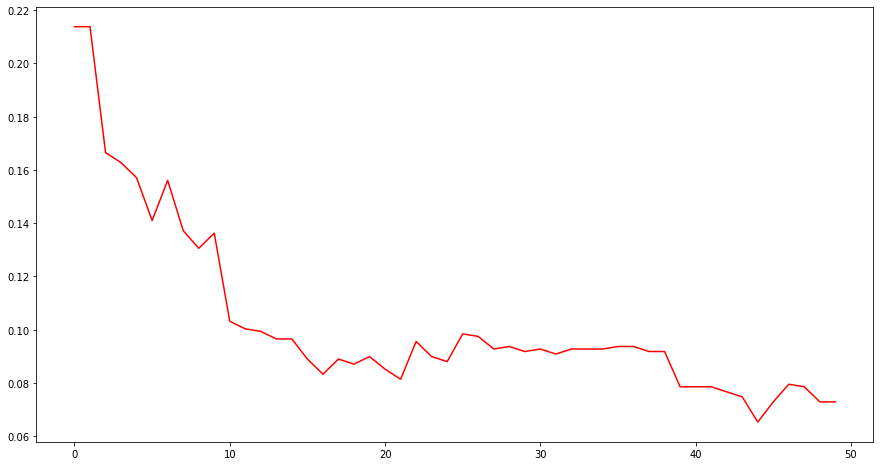

In [213]:
fig = plt.figure(figsize=(15, 8))

plt.plot(range(len(D1_ada_shallow.test_errors)), D1_ada_shallow.test_errors, color="red", label="test error")

In [214]:
accuracy = np.mean(predds ==y_test)
print(accuracy)

0.9271523178807947


# Observations for Model 1
After training the model , we observed that applying Adaboost on Shallow Tree gave an impressive accuracy of 92%

#   

# Model 2

### Applying Adaboost on Deep Tree on Dataset 1

In [407]:
classifier = DecisionTreeClassifier(max_depth = 3,max_leaf_nodes=6)
D1_ada_deep = AdaBoost(T= 50 , lr = 1, base_classifier = classifier)
D1_ada_deep.fit(X_train, y_train, X_test , y_test)

In [216]:
predds = D1_ada_deep.predict(X_test)
predds = predds.tolist()
print(predds)

['G', 'C', 'C', 'C', 'C', 'C', 'C', 'G', 'G', 'C', 'G', 'G', 'C', 'C', 'G', 'C', 'G', 'C', 'G', 'G', 'G', 'C', 'G', 'G', 'G', 'C', 'G', 'G', 'C', 'C', 'G', 'G', 'C', 'C', 'C', 'G', 'G', 'C', 'C', 'G', 'G', 'G', 'G', 'C', 'C', 'C', 'G', 'C', 'C', 'G', 'C', 'C', 'C', 'C', 'G', 'G', 'C', 'G', 'C', 'G', 'C', 'G', 'C', 'G', 'G', 'G', 'C', 'G', 'C', 'G', 'C', 'G', 'C', 'G', 'C', 'C', 'G', 'C', 'G', 'C', 'C', 'G', 'G', 'C', 'C', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'C', 'G', 'C', 'C', 'G', 'C', 'G', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'C', 'G', 'C', 'G', 'C', 'C', 'G', 'G', 'G', 'G', 'C', 'G', 'C', 'G', 'G', 'C', 'C', 'G', 'C', 'G', 'C', 'C', 'C', 'G', 'G', 'C', 'G', 'C', 'C', 'C', 'G', 'G', 'C', 'C', 'G', 'C', 'G', 'C', 'C', 'G', 'G', 'C', 'G', 'C', 'G', 'C', 'C', 'C', 'G', 'C', 'C', 'G', 'G', 'G', 'C', 'G', 'C', 'C', 'G', 'G', 'C', 'C', 'C', 'C', 'G', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'G', 'G', 'C', 'G', 'G', 'C', 'G', 'G', 'C', 'C', 'C', 'G', 'C', 'C', 'G', 'G', 'C', 'C', 'C', 'G', 'G', 'G',

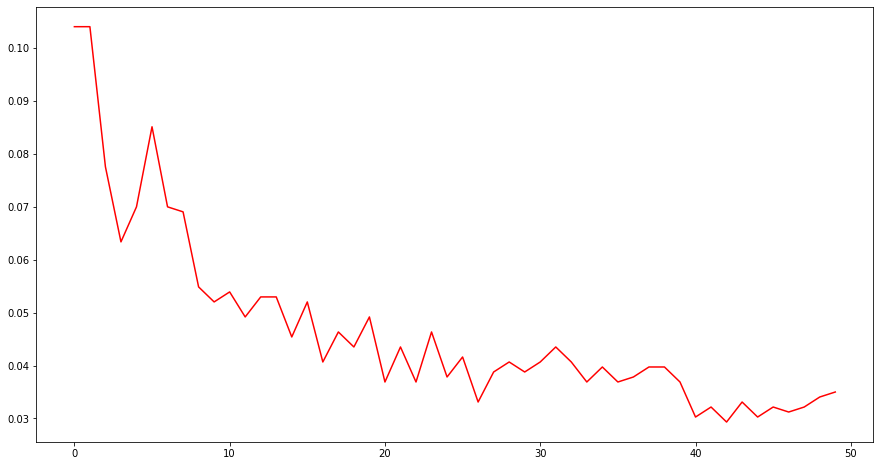

In [217]:
fig = plt.figure(figsize=(15, 8))

plt.plot(range(len(D1_ada_deep.test_errors)), D1_ada_deep.test_errors, color="red", label="test error")

In [218]:
accuracy = np.mean(predds ==y_test)
print(accuracy)

0.9649952696310312


# Observations for Model 2

After training the model, we observed that the accuarcy increased to 96% meaning that deep trees are better for this problem.

#  

# Model 3

### Applying Bagging on Shallow Tree on Dataset 1

### Function for Bagging

In [450]:
from os import major
from pandas.core.array_algos import replace
class Bagging():

  def __init__(self, T, base_classifier):

      self.T = T
      self.base_classifier = base_classifier
      self.classifiers = []
      self.error = []

  def fit(self, X, Y, X_test, Y_test):

      N = X.shape[0]

      #print(X)
      for i in range(self.T):

          classifier = copy.copy(self.base_classifier)

          x_sampled = X.sample(N, replace = True)
          y_sampled = Y.sample(N, replace = True)

          classifier.fit(x_sampled, y_sampled)

          self.classifiers.append(classifier)
          preds = classifier.predict(X_test)
          self.error.append(self.error_function(Y_test,preds))


  def predict(self, X):

      # preds = np.zeros(len(X))

      # for classifier in self.classifiers:

      #     preds = preds + [classifier.predict(X)]
      preds = np.stack([ classifier.predict(X) for classifier in self.classifiers], axis = 1)
      #print(preds.shape)
      #preds = np.transpose(preds)
      #print(preds.shape)
      majority_vote =  st.mode(preds, axis = 1)
      majority_vote = np.array(majority_vote[0])
      majority_vote = majority_vote.flatten()
      #print(majority_vote.shape)

      return majority_vote


  def evaluate(self, Y_test, preds):


      print(Y_test.shape)

      acc = np.mean((Y_test == preds))
      
      return acc

  def error_function(self,y_test, y_pred_test):
        
        testing_error = zero_one_loss(y_test, y_pred_test)
        return testing_error


In [451]:
classifier = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
D1_bag_shallow = Bagging(50, classifier)
#print(X_train)|
D1_bag_shallow.fit(X_train, y_train,X_test,y_test)

In [452]:
predds = D1_bag_shallow.predict(X_test)
predds = np.array(predds)
print(predds)

['C' 'C' 'C' ... 'C' 'C' 'C']


In [453]:
D1_bag_shallow.evaluate(y_test,predds)

(1057,)


0.4806054872280038

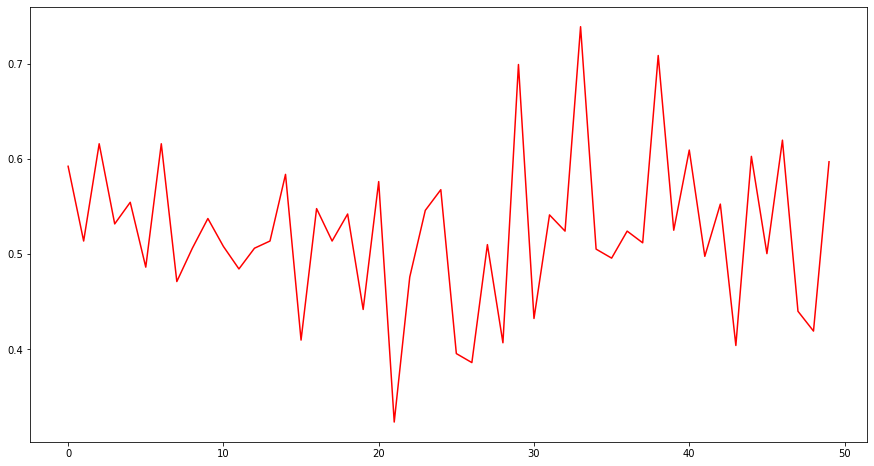

In [458]:
fig = plt.figure(figsize=(15, 8))
e = D1_bag_shallow.error
#print(e)
plt.plot(range(len(e)), e, color="red", label="test error")



# Observations on Model 3

After training the model on Shallow tree using Bagging, we observed that the accuracy was average and didnt improve over ensembling 50 models.

Conclusion : Bagging does not improve accuracy

#  

# Model 4

### Applying Bagging on Deep Tree on Dataset 1

In [467]:
classifier = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20)
D1_bag_deep = Bagging(50, classifier)
#print(X_train)|
D1_bag_deep.fit(X_train, y_train,X_test,y_test)

In [468]:
predds = D1_bag_deep.predict(X_test)
predds = np.array(predds)
print(predds)

['C' 'C' 'C' ... 'C' 'G' 'G']


In [469]:
D1_bag_deep.evaluate(y_test,predds)

(1057,)


0.510879848628193

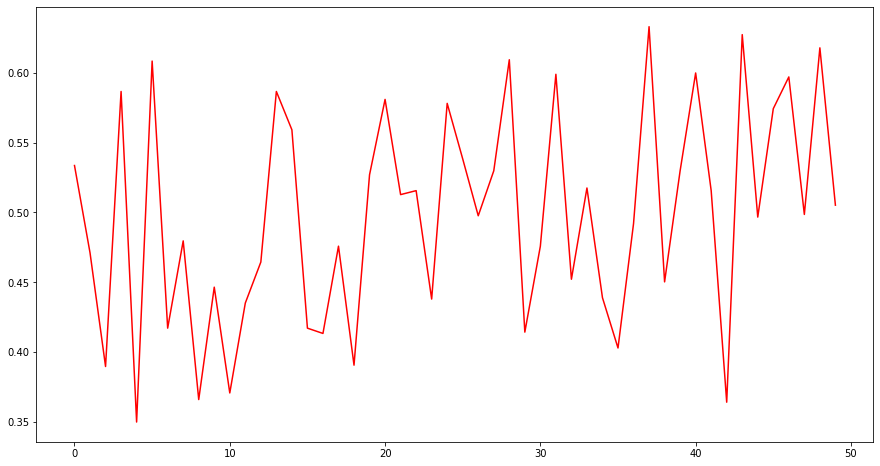

In [470]:
fig = plt.figure(figsize=(15, 8))
e = D1_bag_deep.error
#print(e)
plt.plot(range(len(e)), e, color="red", label="test error")



# Obserrvation on Model 4

After training Model 4 we observed that making the tree deep did not increase accuracy

#  

# Model 5

### Applying AdaBoost on Shallow tree on Dataset 2

In [471]:
german_data = german_data.iloc[:, :-5]

In [472]:
german_data.head()

,1,6,4,12,5,5.1,3,4.1,1.1,67,3.1,2,1.2,2.1,1.3,0,0.1,1.4,0.2,0.3
0,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0
1,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0
2,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0
3,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0
4,4,36,2,91,5,3,3,4,4,35,3,1,2,2,1,0,0,1,0,0


In [473]:
german_data.shape

(999, 20)

In [479]:
label = german_data['label']
label

0      1
1      2
2      1
3      1
4      2
      ..
995    1
996    1
997    1
998    2
999    1
Name: label, Length: 1000, dtype: int64

In [490]:
german_data.drop(labels = 'label', axis = 1, inplace = True)

In [491]:
categorical = [0,2,3,4,5,6,8,9,11,13,14,16,18,19]

### Since dataset has lots of categorical features we label encode them

In [492]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [493]:
german_data[categorical] = german_data[categorical].apply(lambda col: encoder.fit_transform(col))

In [494]:
german_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,6,4,4,142,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0
1,1,48,2,4,770,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0
2,3,12,4,7,390,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0
3,0,42,2,3,848,0,3,2,2,2,4,1,45,2,2,1,2,2,0,0
4,0,24,3,0,734,0,2,3,2,0,4,3,53,2,2,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,3,310,0,3,3,1,0,4,0,31,2,1,1,1,1,0,0
996,0,30,2,1,661,0,2,4,0,0,4,1,40,2,1,1,3,1,1,0
997,3,12,2,4,69,0,4,4,2,0,4,2,38,2,1,1,2,1,0,0
998,0,45,2,4,332,0,2,4,2,0,4,3,23,2,2,1,2,1,1,0


In [495]:
X_train , X_test , y_train , y_test = train_test_split(german_data,label,test_size = 0.6)

In [496]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
997,3,12,2,4,69,0,4,4,2,0,4,2,38,2,1,1,2,1,0,0
67,1,12,2,0,107,3,2,4,3,0,1,0,22,2,1,1,2,1,0,0
289,0,24,3,4,108,0,1,4,3,0,4,0,48,1,1,1,2,1,0,0
360,1,18,2,7,169,4,2,4,2,0,4,3,61,2,2,1,2,1,0,0
579,3,24,2,8,94,0,1,4,3,0,3,2,27,2,1,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,3,12,2,1,468,4,1,2,3,0,4,2,26,2,0,1,2,1,1,0
333,3,48,4,1,895,1,2,2,1,0,4,2,24,0,0,2,1,1,0,0
556,1,18,0,0,429,1,1,3,1,0,3,2,28,2,1,2,2,1,0,0
975,2,24,2,4,176,2,2,3,1,0,3,2,57,2,1,1,1,1,0,0


In [514]:
classifier = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
D2_ada_shallow = AdaBoost(50, 1, classifier)
#print(X_train)
D2_ada_shallow.fit(X_train, y_train,X_test,y_test)

In [515]:
predds = D2_ada_shallow.predict(X_test)
predds = np.array(predds)
print(predds)

[1 1 1 1 1 1 2 1 1 2 1 1 2 1 2 2 1 2 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 2 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2
 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1 1
 1 2 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 2 1
 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 2 1 1 2 2 2 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1
 1 1 1 1 2 1 2 1 2 2 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1
 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 2 1 2 1 1 2 1 1 1 1
 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 1 2 

In [516]:
predds = D2_ada_shallow.predict(X_test)
predds = predds.tolist()
print(predds)

[1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 

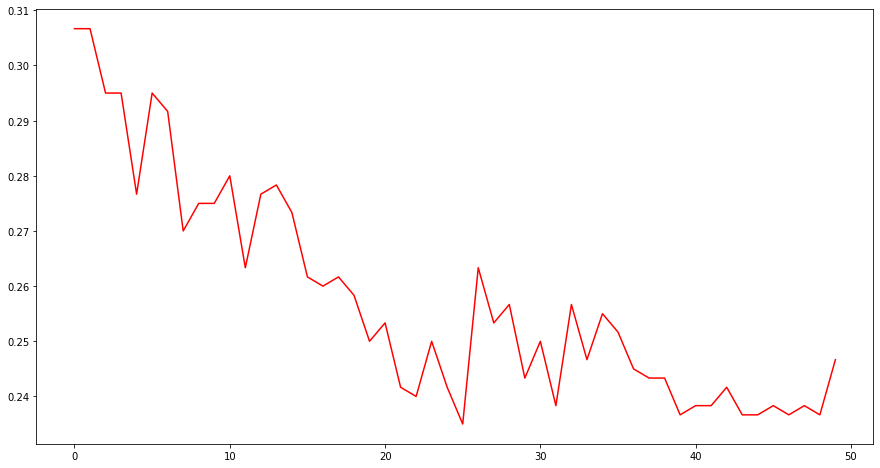

In [517]:
fig = plt.figure(figsize=(15, 8))

plt.plot(range(len(D2_ada_shallow.test_errors)), D2_ada_shallow.test_errors, color="red", label="test error")

In [518]:
accuracy = np.mean(predds ==y_test)
print(accuracy)

0.7533333333333333


# Observations on Model 5

After training model ,we observed that boosting gave good accuracy.

#  

# Model 6

### Applying Bagging on Deep Tree on Dataset 2

In [523]:
classifier = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10)
D2_ada_deep = AdaBoost(50, 1, classifier)
#print(X_train)
D2_ada_deep.fit(X_train, y_train,X_test,y_test)

In [524]:
predds = D2_ada_deep.predict(X_test)
predds = np.array(predds)
print(predds)

[1 1 1 1 1 1 2 1 1 2 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 2 1 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 2
 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 1 2 1 1 1 1 1 2 2 1
 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1
 1 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 2 1 2 2 1
 1 2 1 2 1 1 2 1 1 1 2 2 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 1 1 2 2 2 1 1 1 1 1
 1 1 1 1 2 1 2 1 1 2 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1
 1 1 1 1 2 1 1 2 1 1 1 1 2 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 2 2 1 2 1 1
 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 1 1 2
 1 2 1 1 1 1 1 1 1 1 1 2 

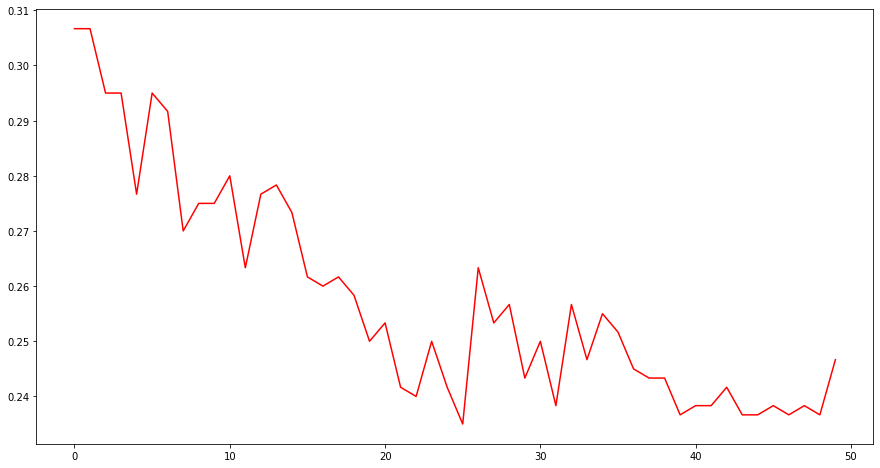

In [525]:
fig = plt.figure(figsize=(15, 8))

plt.plot(range(len(D2_ada_shallow.test_errors)), D2_ada_shallow.test_errors, color="red", label="test error")

In [526]:
accuracy = np.mean(predds ==y_test)
print(accuracy)

0.7316666666666667


# Observations on Model 6

After training model 6 , we observed that model didnt improve for deep trees

#  

# Model 7

### Applying bagging on shallow tree for Dataset 2

In [505]:
classifier = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
D2_bag_shallow = Bagging(50, classifier)
#print(X_train)|
D2_bag_shallow.fit(X_train, y_train,X_test,y_test)

In [507]:
predds = D2_bag_shallow.predict(X_test)
predds = np.array(predds)
print(predds)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [508]:
D2_bag_shallow.evaluate(y_test,predds)

(600,)


0.6933333333333334

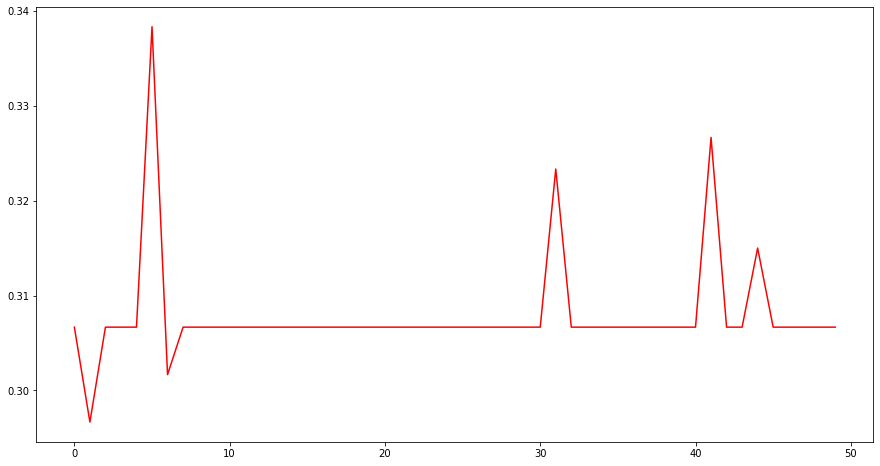

In [510]:
fig = plt.figure(figsize=(15, 8))
e = D2_bag_shallow.error
#print(e)
plt.plot(range(len(e)), e, color="red", label="test error")

# Observations for Model 7

After traning , we observed that bagging gave an average accuracy

#  

# Model 8 

Applying Bagging on Deep Tree for Dataset 2

In [527]:
classifier = DecisionTreeClassifier(max_depth=4)
D2_bag_deep = Bagging(50, classifier)
#print(X_train)|
D2_bag_deep.fit(X_train, y_train,X_test,y_test)

In [529]:
predds = D2_bag_deep.predict(X_test)
predds = np.array(predds)
print(predds)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [573]:
D2_bag_deep.evaluate(y_test,predds)

(3681,)


0.610975278456941

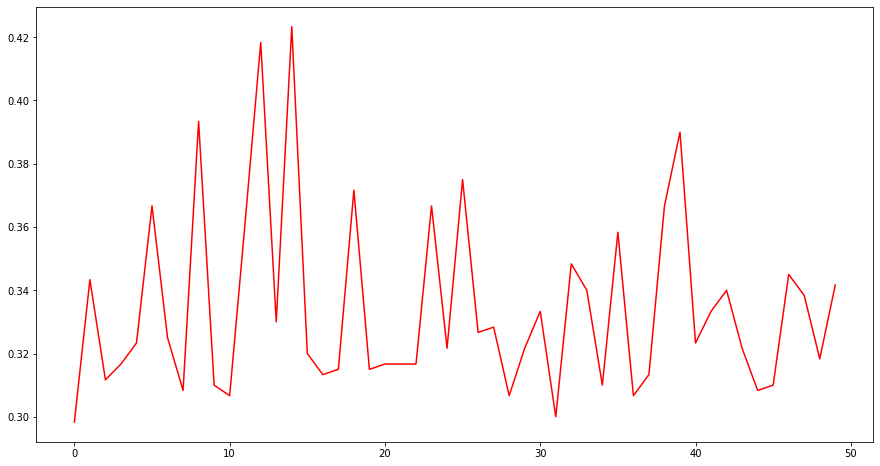

In [531]:
fig = plt.figure(figsize=(15, 8))
e = D2_bag_deep.error
#print(e)
plt.plot(range(len(e)), e, color="red", label="test error")

# Observations on Model 8

After training we observed that accuracy didnt improve for deep trees

#  

# Model 9

### Applying Adaboost on Shallow Trees for Dataset 3

In [537]:
labels = spam_data['label']

In [538]:
label

0      1
1      2
2      1
3      1
4      2
      ..
995    1
996    1
997    1
998    2
999    1
Name: label, Length: 1000, dtype: int64

In [539]:
spam_data.drop(labels='label', axis= 1, inplace = True)

In [540]:
spam_data

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


Applying Standard Scaling on continous features

In [541]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [544]:
spam_data_scaled = scaler.fit_transform(spam_data)

In [545]:
spam_data_scaled

array([[-3.42433707e-01,  3.30884903e-01,  7.12858774e-01, ...,
        -4.52472762e-02,  4.52979198e-02, -8.72413388e-03],
       [ 3.45359395e-01,  5.19091945e-02,  4.35129540e-01, ...,
        -2.44326749e-03,  2.50562832e-01,  1.22832407e+00],
       [-1.45921392e-01, -1.65071912e-01,  8.51723390e-01, ...,
         1.45920848e-01,  2.22110599e+00,  3.25873251e+00],
       ...,
       [ 6.40127868e-01, -1.65071912e-01,  3.83734930e-02, ...,
        -1.19382054e-01, -2.36941335e-01, -2.72627750e-01],
       [ 2.80176333e+00, -1.65071912e-01, -5.56760578e-01, ...,
        -1.27482666e-01, -2.42072958e-01, -3.38603654e-01],
       [-3.42433707e-01, -1.65071912e-01,  7.32696576e-01, ...,
        -1.24236117e-01, -2.42072958e-01, -4.01280763e-01]])

In [548]:
X_train , X_test , y_train , y_test = train_test_split(spam_data_scaled,labels,test_size = 0.8)

In [549]:
X_train

array([[-0.34243371, -0.16507191, -0.55676058, ..., -0.09709749,
        -0.23180971, -0.43591811],
       [-0.34243371, -0.16507191, -0.55676058, ..., -0.08385914,
        -0.11378239, -0.33365546],
       [-0.34243371, -0.16507191, -0.55676058, ..., -0.10705778,
        -0.21128322, -0.33695426],
       ...,
       [ 0.11609503, -0.16507191,  0.01853569, ..., -0.08584489,
        -0.12404563,  0.30631081],
       [-0.34243371, -0.16507191, -0.55676058, ...,  0.27562519,
         0.31727393,  1.71654576],
       [-0.34243371, -0.16507191, -0.55676058, ..., -0.13211609,
        -0.26259945, -0.45406149]])

In [550]:
classifier = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
D3_ada_shallow = AdaBoost(50, 1, classifier)
#print(X_train)
D3_ada_shallow.fit(X_train, y_train,X_test,y_test)

In [552]:
predds = D3_ada_shallow.predict(X_test)
predds = np.array(predds)
print(predds)

[0 0 0 ... 0 1 0]


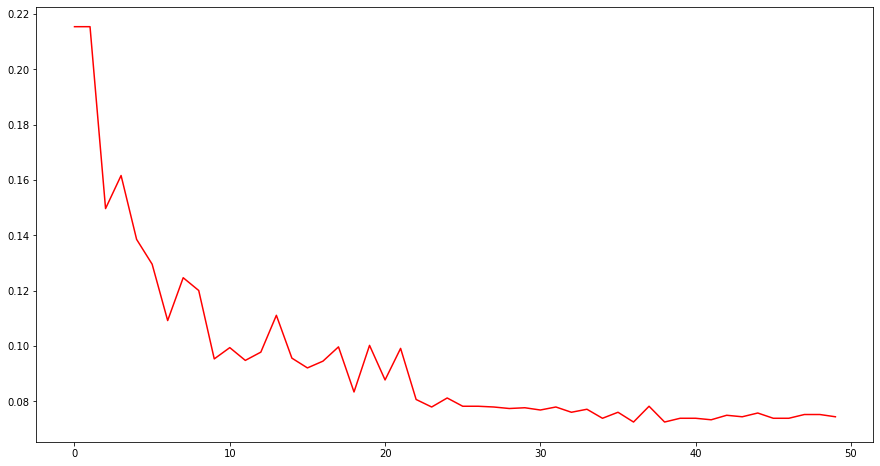

In [555]:
fig = plt.figure(figsize=(15, 8))

plt.plot(range(len(D3_ada_shallow.test_errors)), D3_ada_shallow.test_errors, color="red", label="test error")

In [554]:
accuracy = np.mean(predds ==y_test)
print(accuracy)

0.9255637055148057


# Observations on Model 9 

After training we observed that accuracy was impressive for dataset 3

#  

# Model 10

### Applying Adaboost on Deep Trees for Dataset 3 

In [556]:
classifier = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10)
D3_ada_deep = AdaBoost(50, 1, classifier)
#print(X_train)
D3_ada_deep.fit(X_train, y_train,X_test,y_test)

In [558]:
predds = D3_ada_deep.predict(X_test)
predds = np.array(predds)
print(predds)

[0 1 0 ... 0 1 0]


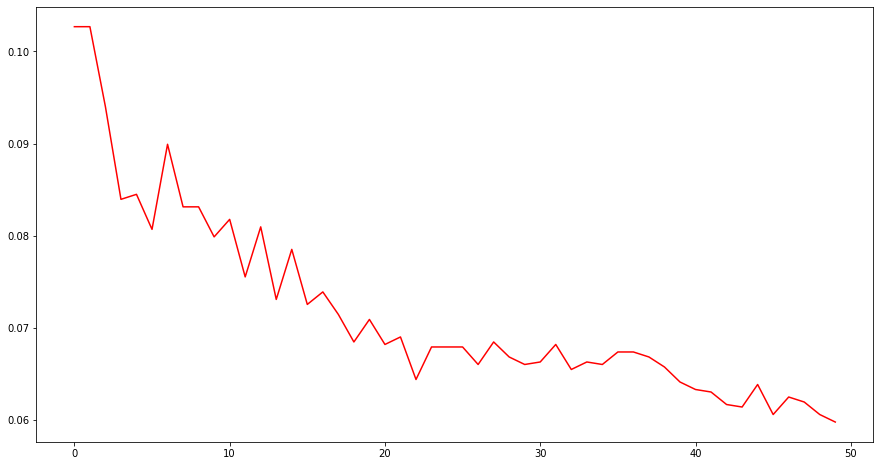

In [560]:
fig = plt.figure(figsize=(15, 8))

plt.plot(range(len(D3_ada_deep.test_errors)), D3_ada_deep.test_errors, color="red", label="test error")

In [561]:
accuracy = np.mean(predds ==y_test)
print(accuracy)

0.9402336321651725


# Observations on Model 10

After training we observed that accuracy improved a lot for deep trees

#  

# Model 11

### Applying Bagging on Shallow Trees for Dataset 3

In [563]:
X_train = pd.DataFrame(X_train)
Y_train = pd.DataFrame(y_train)

In [564]:
classifier = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
D3_bag_shallow = Bagging(50, classifier)
#print(X_train)|
D3_bag_shallow.fit(X_train, y_train,X_test,y_test)

In [566]:
predds = D3_bag_shallow.predict(X_test)
predds = np.array(predds)
print(predds)

[0 0 0 ... 0 0 0]


In [567]:
D3_bag_shallow.evaluate(y_test,predds)

(3681,)


0.610975278456941

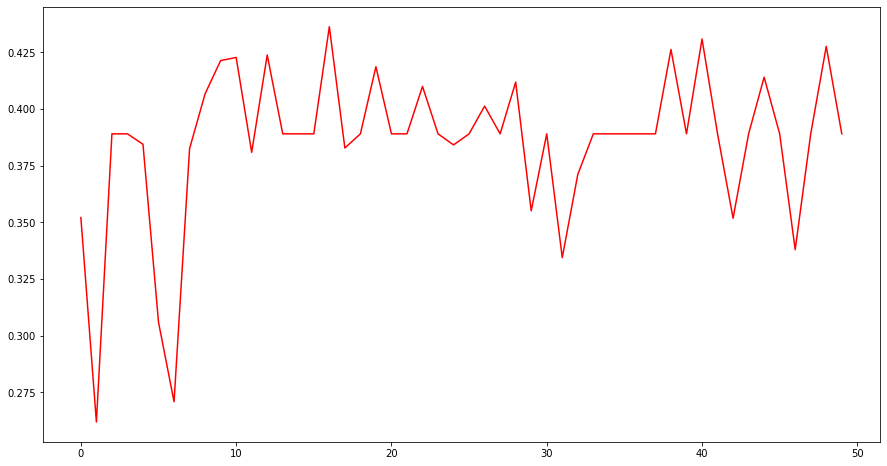

In [568]:
fig = plt.figure(figsize=(15, 8))
e = D3_bag_shallow.error
#print(e)
plt.plot(range(len(e)), e, color="red", label="test error")

# Observations on Model 11

After training we observed that model gave accuracy an impressive accuracy

#  

# Model 12

### Applying Bagging on Deep Trees for Dataset 3

In [569]:
classifier = DecisionTreeClassifier(max_depth=4)
D3_bag_deep = Bagging(50, classifier)
#print(X_train)|
D3_bag_deep.fit(X_train, y_train,X_test,y_test)

In [571]:
predds = D3_bag_deep.predict(X_test)
predds = np.array(predds)
print(predds)

[0 0 0 ... 0 0 0]


In [574]:
D3_bag_deep.evaluate(y_test,predds)

(3681,)


0.610975278456941

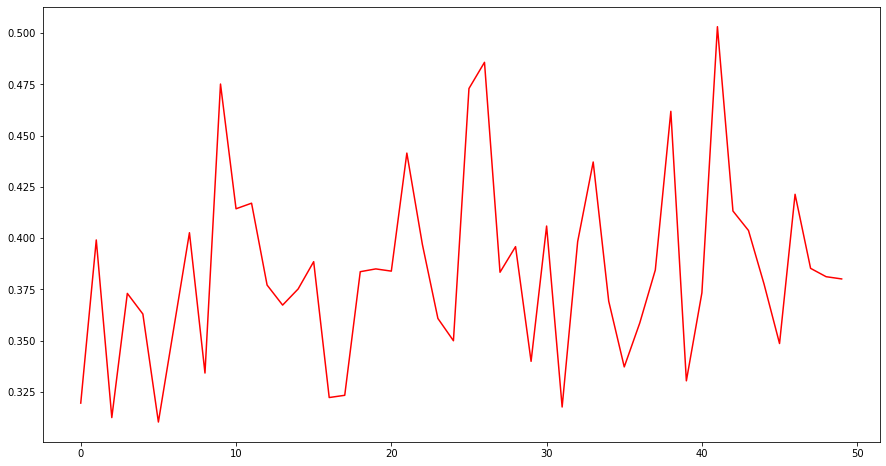

In [572]:
fig = plt.figure(figsize=(15, 8))
e = D3_bag_deep.error
#print(e)
plt.plot(range(len(e)), e, color="red", label="test error")

# Observations on Model 12

After training we observed that model did not improve for deep trees

# Final Conclusion

### After training all 12 models, on 3 datasets , with 2 of Boosting and 2 or Bagging for each of them and observering the accuracies and plotting loss- error fucntion , we come to a conclusion that AdaBoosting or Boosting in general improves the accuracy by a good amount and also converges well .
### Whereas for bagging the final outputs didnt improve much for shallow trees and also same for deep trees 
### Also Making trees deep worked well for Boosting but didnt change much for Bagging